In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import time

In [2]:
X,y=load_diabetes(return_X_y=True)

In [3]:
print(X.shape) #Note that there are 10 columns present

(442, 10)


In [4]:
X.shape[1]

10

In [5]:
print(y.shape)

(442,)


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [8]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [9]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [10]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):   #If the learning rate or epochs in not provided by user, then we will take 0.01 and 100 by default
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
    
    def fit(self,x_train,y_train):
        #initialise your coefficients
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            #Update all the coefficients and intercepts
            y_hat=np.dot(X_train,self.coef_)+self.intercept_  #np.dot is doing the dot product of two vectors.
            intercept_der= -2 * np.mean(y_train-y_hat)
            self.intercept_=self.intercept_ - (self.lr * intercept_der)
            
            #the below part gives the new values of all the coefficients.
            coef_der= -2 * np.dot((y_train-y_hat), X_train)/X_train.shape[0]
            self.coef_=self.coef_ - (self.lr * coef_der)
            
        
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
         

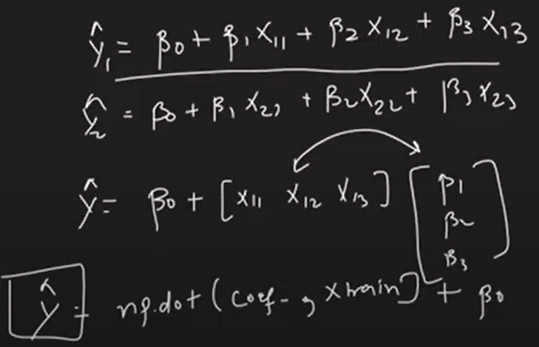

In [11]:
gdr=GDRegressor()

In [12]:
gdr.fit(X_train,y_train)

130.5289694245351 [ 2.63772235  1.19060609  5.06046251  4.31378209  2.44715571  1.99246126
 -1.48838841  3.60218118  5.24194016  3.51394805]


In [13]:
np.ones(X_train.shape[1])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X_train.shape

(353, 10)

In [15]:
X_train.shape[0]

353

In [18]:
gdr=GDRegressor(epochs=1000, learning_rate=0.5)

start=time.time()
gdr.fit(X_train,y_train)
print('Time taken is:', time.time() - start)

152.0135263267291 [  14.38915082 -173.72674118  491.54504015  323.91983579  -39.32680194
 -116.01099114 -194.04229501  103.38216641  451.63385893   97.57119174]
Time taken is: 0.11866593360900879
